In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt
df = pd.read_csv('aspects_AdAN_sent.csv',sep=',')
df = df.drop(['Unnamed: 0'],axis=1)
df = df.fillna('unknown')
df

,aspects,frequency,emotions,Performance
0,too easy Wait,1,Surprise,B
1,pretty sure Im,1,Happy,B
2,really matter Okay,1,Surprise,B
3,so confused Go,1,Fear,B
4,Youre good Are,1,Happy,B
...,...,...,...,...
270,not binary gender,1,unknown,C
271,too expensive Half,1,unknown,C
272,really thrive living,1,Surprise,C
273,Yeah right Im,1,Fear,C


In [29]:
#cat_variables = df[['aspects', 'emotions']]
#cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
#cat_dummies.head()
enc = LabelEncoder()
df['aspects_enc'] = enc.fit_transform(df['aspects'])
df['emotions_enc'] = enc.fit_transform(df['emotions'])
df['Performance_enc'] = enc.fit_transform(df['Performance'])


In [31]:
data = df[['aspects_enc','emotions_enc']]
from sklearn import preprocessing
# Get column names first
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [33]:
scaled_df['Performance'] = df['Performance_enc']

In [34]:
scaled_df

,aspects_enc,emotions_enc,Performance
0,1.284875,0.320567,1
1,0.050387,-0.854845,1
2,0.277130,0.320567,1
3,0.516469,-1.442551,1
4,-1.184101,-0.854845,1
...,...,...,...
270,-0.365308,0.908273,2
271,1.297472,0.908273,2
272,0.377904,0.320567,2
273,-1.209294,-1.442551,2


In [41]:
X = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Minimum Error:- 1.2960718294051627 at K = 8


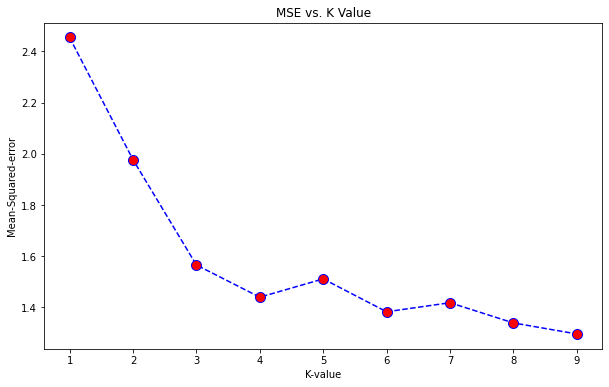

In [42]:
import matplotlib.pyplot as plt
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(mean_squared_error(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value')
plt.xlabel('K-value')
plt.ylabel('Mean-Squared-error')
print("Minimum Error:-",min(acc),"at K =",acc.index(min(acc)))

In [10]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
pred=model.predict(X_test)
#print('The r2_score for the model is:',r2_score(y_test,pred))
print('The MSE for the model is:',mean_squared_error(pred,y_test))

The MSE for the model is: 1.1957142857142855


<ipython-input-11-10af2545d749>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


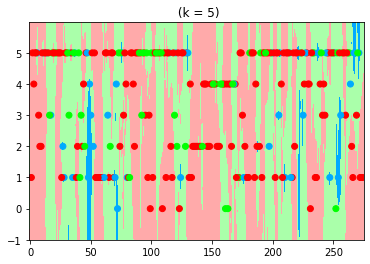

In [11]:
X = np.array(X)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02
n_neighbors = 5
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsRegressor(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.pcolormesh(times, frequencies, spectrogram,shading='auto' )
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.rcParams['pcolor.shading'] ='nearest'

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(" (k = %i)" % (n_neighbors))
plt.show(block=False)

C:\Users\divya\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


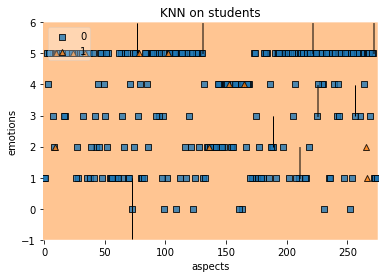

In [37]:
y = np.array(y).astype(int)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('aspects')
plt.ylabel('emotions')
plt.title('KNN on students')
plt.show()

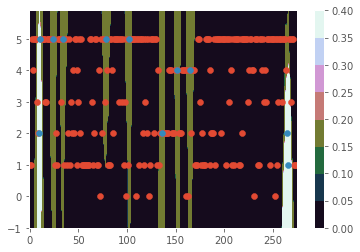

In [86]:
n_neighbors = 5
from matplotlib import pyplot
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
knn = KNeighborsRegressor(n_neighbors, weights='distance')
# fit the model
knn.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# keep just the probabilities for class 0

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz, cmap='cubehelix')
# add a legend, called a color bar
pyplot.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(28):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='jet')
# show the plot
pyplot.show()

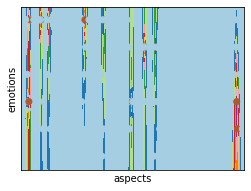

In [59]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel('aspects')
plt.ylabel('emotions')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

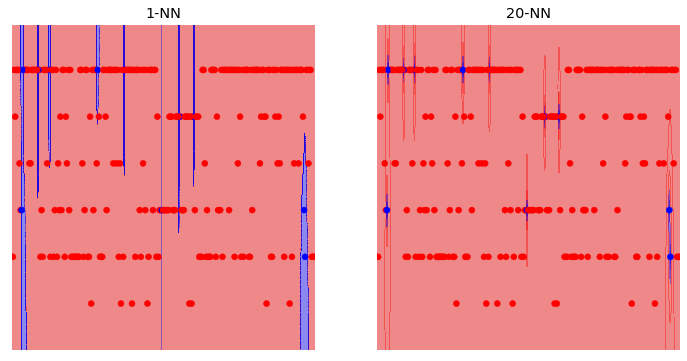

In [82]:
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
figure = plt.figure(figsize=(12, 6))
n_neighbours = [1, 20]
i = 1
for n in n_neighbours:
    clf = KNeighborsRegressor(n, weights='distance')
    clf.fit(X, y)
    ax = plt.subplot(1, len(n_neighbours), i)
    i += 1

    plot_decision_regions(X=X, y=y, classifier=clf)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(str(n) + '-NN')

plt.show()

In [70]:
def plot(knn, X, y, shape=(1, 1), step_size=1, refinement=100):
    """
    Run kNN algorithm with visualization
    :param knn: kNN object
    :param X: test data
    :param y: test labels
    :param shape: shape of the plot grid. Each grid element is representing
    a k.
    :param step_size: increasing number for k in each plot grid element
    :param refinement: refinement for decision boundary
    :return: list, evaluation of empirical loss for every k
    """
    # determine the range of the datapoints
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # determine refinement of meshgrid
    h = [(x_max - x_min) / refinement, (y_max - y_min) / refinement]

    # establish grid plot
    fig, axs = plt.subplots(*shape)
    fig.figsize = (18,18)
    axs = np.ravel(axs)

    # collector for loss
    loss = []

    for j, k in enumerate(range(1, (shape[0] * shape[1])*step_size+1, step_size)):
        # meshgrid ------------------------------------------------------------

        # create mesh for boundary evaluation
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h[0]),
                             np.arange(y_min, y_max, h[1]))
        # predict the classes
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # visualise -----------------------------------------------------------

        # create a contour plot, with a separating decision boundary
        axs[j].contourf(xx, yy, Z)

        # Plot also the test points with corresponding class color
        axs[j].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
        # label sup plot
        axs[j].set_title("k = %i" % k)

        # some aesthetics
        axs[j].axis('off')

        # determine loss ------------------------------------------------------
        _loss = np.mean(mean_squared_error(knn.predict(X),y))
        loss+=[(k,_loss)]

    plt.show()

    return loss


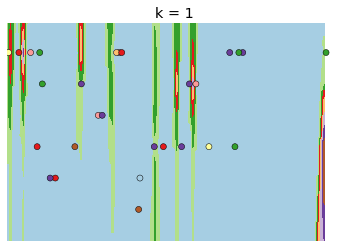

[(1, 0.8217102759973071)]

In [71]:
#knn = kNN(X_train, y_train)

plot(knn, X_test, y_test)

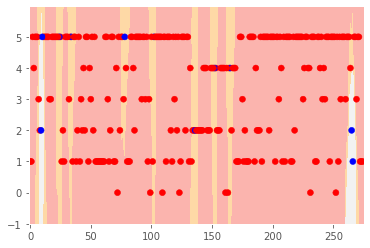

In [84]:
n_neighbors = 5
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsRegressor(n_neighbors)
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

No handles with labels found to put in legend.


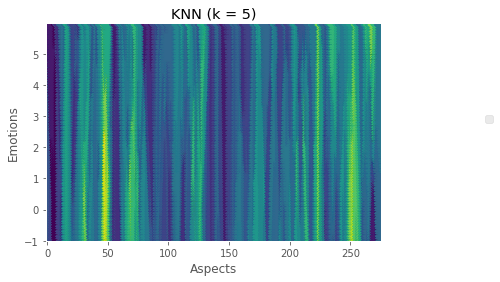

In [75]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)
h = .02  # step size in the mesh
n_neighbors= 5
# Create color maps

X = np.array(X)
y = y.astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsRegressor(n_neighbors, metric='euclidean')
clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_light)
    # Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    #print(X_test[indices, 0], X_test[indices, 1])
plt.scatter(xx, yy,c=Z)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Aspects')
plt.ylabel('Emotions')
plt.title("KNN (k = %i)"
              % (n_neighbors))
plt.legend(bbox_to_anchor = (1.35, 0.6))      
plt.show()

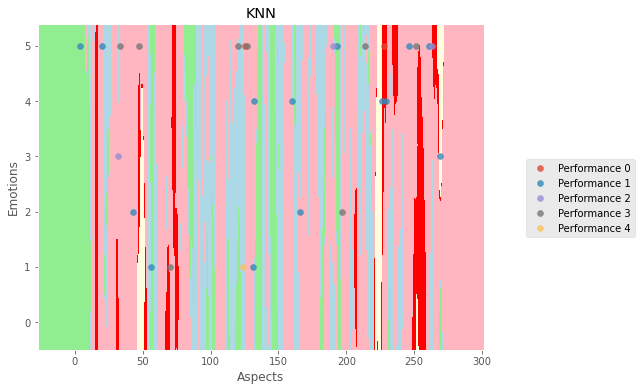

In [19]:
from matplotlib.colors import ListedColormap
X_train = np.array(X_train)
X_test = np.array(X_test)
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1
# Create color maps
cmap_light = ListedColormap(['lightgreen','lightblue','lightpink','red','lightyellow'])
cmap_bold = ListedColormap(['green','blue','pink','darkred','yellow'])
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))
clf  = KNeighborsRegressor(n_neighbors = 5)
clf.fit(X_train,y_train)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=cmap_light)
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    #print(X_test[indices, 0], X_test[indices, 1])
    plt.scatter(X_test[indices, 0], X_test[indices, 1], alpha=0.8, 
                label='Performance {}'.format(label), cmap=cmap_bold)

plt.legend(bbox_to_anchor = (1.35, 0.6))
plt.title('KNN')
plt.xlabel('Aspects')
plt.ylabel('Emotions')
plt.show()

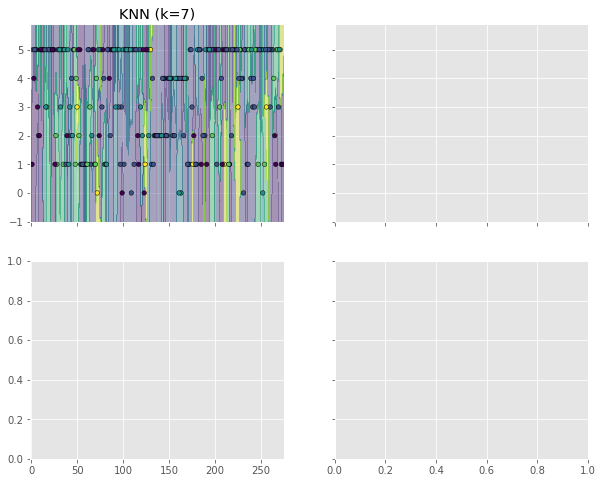

In [74]:
from itertools import product
clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf],
                        ['KNN (k=5)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [43]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(X, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    
# Create color maps
    cmap_light = ListedColormap(['lightgreen','lightblue','lightpink','red','lightyellow'])
    cmap_bold = ListedColormap(['green','blue','pink','darkred','yellow'])
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx,yy,Z,cmap=cmap_light)
    #plt.pcolormesh(xx, yy, Z, vmin=Z.min(), vmax=Z.max())
    # Plot testing points
    d = enc.inverse_transform(y)
    for label in np.unique(d):
        indices = np.where(d == label)
    #print(X_test[indices, 0], X_test[indices, 1])
        plt.scatter(X[indices, 0], X[indices, 1], alpha=0.8, 
                label='Performance {}'.format(label), cmap = cmap_bold)
    #plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8,label='Performance {}'.format(label))"""
    #plt.scatter(xx, yy, c=Z)    
    plt.xlabel("Aspects",fontsize=15)
    plt.ylabel("Emotions",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

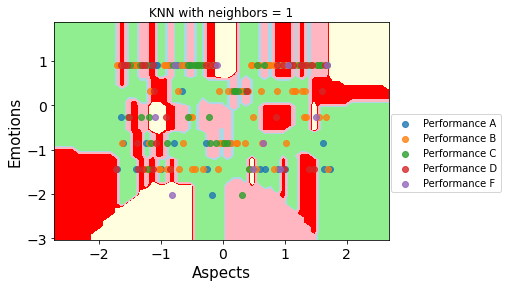

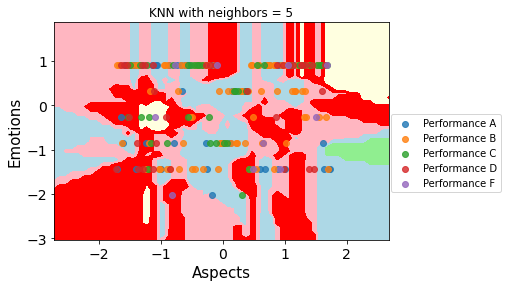

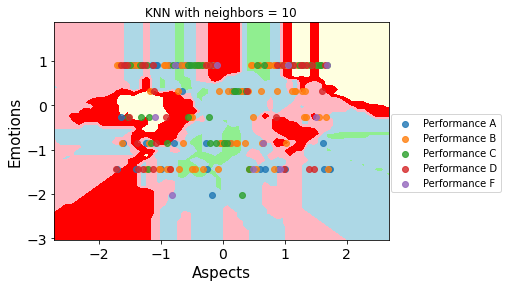

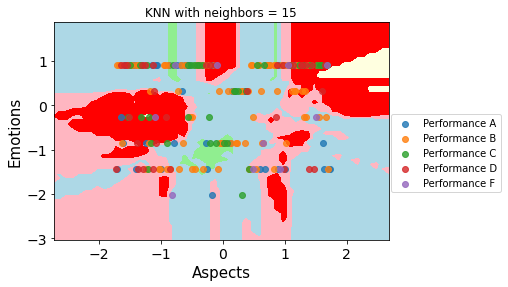

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
knn = KNeighborsRegressor()
for k in [1,5,10,15]:
    plt.figure()
    plt.title('KNN with neighbors = {}'.format(k))
    plot_decision_boundaries(X_train,y_train,KNeighborsRegressor,n_neighbors=k)
    plt.legend(bbox_to_anchor = (1.35, 0.6))
    plt.show()

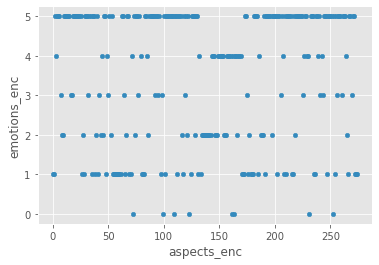

In [86]:
df.plot(x='aspects_enc',y='emotions_enc',kind='scatter')
plt.show()

In [ ]:
supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'